# 6. Deep Neural networks - Initialization Techniques: Xavier
<p>We'll explore how initialization techniques help avoid vanishing or exploding gradients.</p>
Test Uniform, Default and Xavier Initialization.

<ul>
    <li><a href="#data">Data</a></li>
    <li><a href="#model">Model</a></li>
    <li><a href="#training">Training with initialization variants</a></li>
    <li><a href="#results">Results: various initializations</a></li>
</ul>

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

## <a name="data" id="data">Data</a>

In [3]:
# Create the train dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [4]:
# Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [5]:
# Create Dataloader for both train dataset and validation dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

## <a name="model" id="model">Model: variations and parameters</a>

In [6]:
# Create the model class

class Net_Xavier(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [7]:
# Define the neural network with Uniform initialization

class Net_Uniform(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [8]:
# Define the neural network with Default initialization

class Net(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [ ]:
# Criterion
criterion = nn.CrossEntropyLoss()

# DNN Parameters
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]

# Training parameters
learning_rate = 0.01
epochs = 15

## <a name="training" id="training">Training</a>
**May take a few minutes**

In [10]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss':[], 'validation_accuracy':[]}  
    
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label==y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
        
    return loss_accuracy

In [ ]:
# Training various models

# Train the model with default initialization
model = Net(layers)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [12]:
# Train the model with Xavier initialization

model_Xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=learning_rate)
training_results_Xavier = train(model_Xavier, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [13]:
# Train the model with Uniform initialization

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

## <a name="results" id="results">Results: various initializations</a>

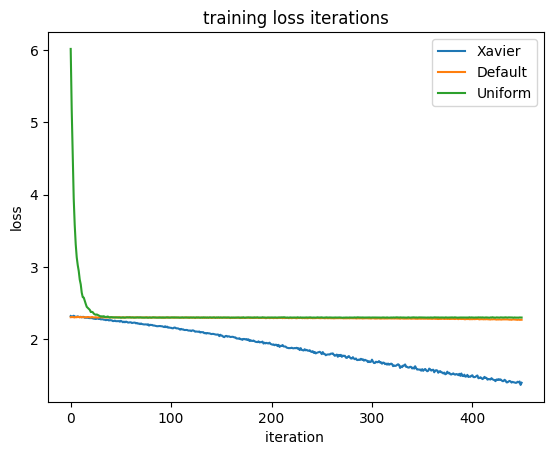

In [14]:
# Compare loss change per initialization technique

plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')  
plt.title('training loss iterations')
plt.legend()

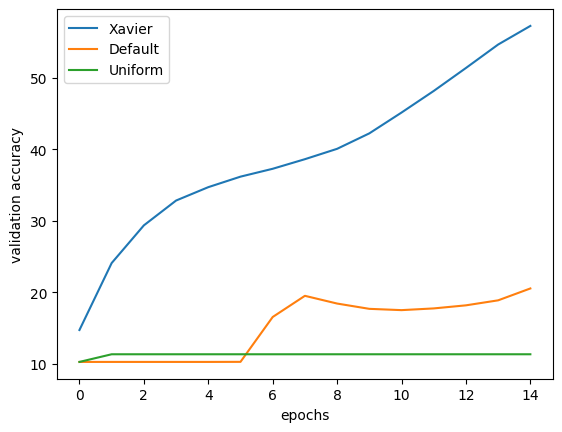

In [15]:
# Compare accuracy per initialization technique

plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()